# Notebook 01:
# Reading raw data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

import os
import sys
import pickle

C:\Users\merto\AppData\Local\Temp\ipykernel_10560\1912075834.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Reading raw excel files:

path = Path(r'..\data\raw')
file_names = os.listdir(path)
file_paths = [os.path.join(path, Path(i)) for i in file_names]
city_names = [i[:-12] for i in file_names]

In [3]:
radiation_frames = {}  #a dictionary of loaded excel files
null_counts = {}        #null values in each loaded excel file

for city, path in zip(city_names, file_paths):
    frame = pd.read_excel(path, names=['time', 'abs_radiation'])
    radiation_frames[city] = frame
    null_counts[city] = frame.isnull().sum()

C:\Users\merto\Documents\codes\Iran_solar_radiation\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\merto\Documents\codes\Iran_solar_radiation\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\merto\Documents\codes\Iran_solar_radiation\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\merto\Documents\codes\Iran_solar_radiation\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply o

In [4]:
null_counts = pd.DataFrame(null_counts).T

#Showing null_counts for cities with null values
null_counts[null_counts.sum(axis=1) !=0]

time  abs_radiation
AHV                  0              1
BJN                  0              4
BSH                  0             11
GRG                  0              2
HMD                  0              2
JSK                  0             15
khur va biabanak     0              7
KRJ                  0              8
MSH                  0              1
ORO                  0              2
SHZ                  0              4
YAS                  0              2
yazd                 0              6
ZNJ                  0              3

In [5]:
#droping null values:
for city in city_names:
    radiation_frames[city] = radiation_frames[city].dropna()

## Plotting data:

In [6]:
def subplot_radiation_frame(fig, axes, city_names,radiation_frames):
    """
    Scatter Plot radiation values of multiple cities in a single figure.

    Parameters
    ----------

    fig : `matplotlib.figure.Figure`
        fig object returned by the matplotlib subplot function.
    
    axes : `numpy.ndarray`
        axes returned by the matplotlib subplot function.
    
    city_names : `list`
        A list of city names.
    
    radiation_frames : `dict`
        A dict witch city names are it's keys,
        and cities radiation DataFrames are it's values.
    """

    fig.suptitle('DAILY IR RADIATION', fontsize=32)
    
    for city, ax in zip(city_names, axes.ravel()):
        frame = radiation_frames[city]
        ax.scatter(frame.time, frame.abs_radiation, s=0.4, alpha=0.6, c='indigo')
        ax.set_title(city)

    # Omit extra unsused empty axes
    empty_axes_len = 6*6 - len(city_names)
    for i in range(empty_axes_len):
        ax = axes.ravel()[-(i+1)]
        fig.delaxes(ax)

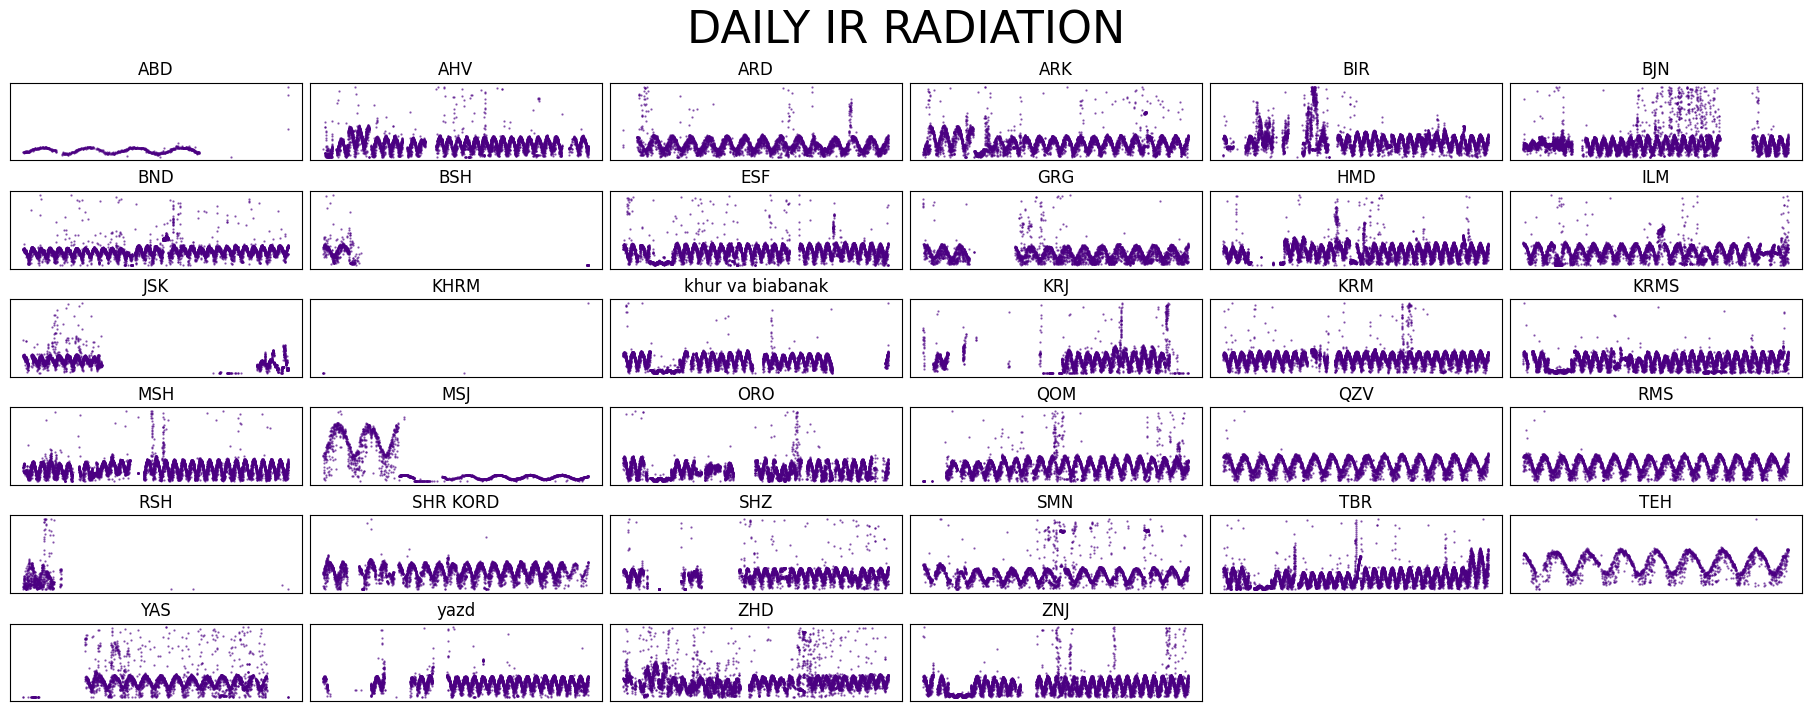

In [7]:
fig, axes = plt.subplots(6, 6, figsize=(18, 7), layout='constrained',
                        subplot_kw={'xticks':(), 'yticks':()})

subplot_radiation_frame(fig, axes, city_names, radiation_frames)

In [8]:
def plot_city_radiation(fig, ax, name, radiation_frames):
    '''
    Scatter plot radiation values of a city:

    Parameters
    ----------

    fig : `matplotlib.figure.Figure`
        fig object returned by the matplotlib subplot function.
    
    ax : `matplotlib.axes._axes.Axes`
        ax returned by the matplotlib subplot function.
    
    name : `str`
        Name of city witch we want to plot it's radiation values.
    
    radiation_frames : `dict`
        A dict witch city names are it's keys,
        and cities radiation DataFrames are it's values.
    '''
    
    frame = radiation_frames[city]
    ax.scatter(frame.time, frame.abs_radiation
               , c='indigo', s = 0.4, alpha = 0.6)

    #Calculating the range of sample dates.
    start = min(frame.time).year
    end = max(frame.time).year + 2
    time_range = np.arange(start, end, 1)
    time_range = [pd.Timestamp(year=i, month=1, day=1) for i in time_range]
    
    ax.set_title(city)
    ax.set_xlabel('year')
    ax.set_xticks(time_range)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_ylabel('Daily irradiation (MJ/m2)')
    ax.grid(True)

C:\Users\merto\AppData\Local\Temp\ipykernel_10560\279543128.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')


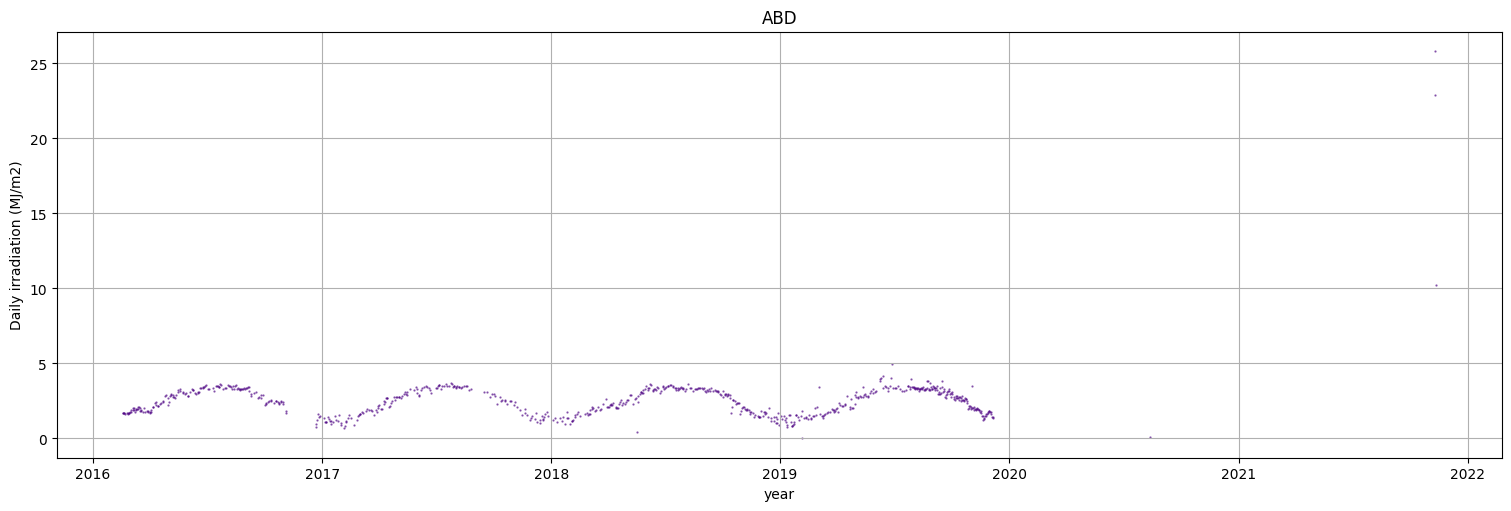

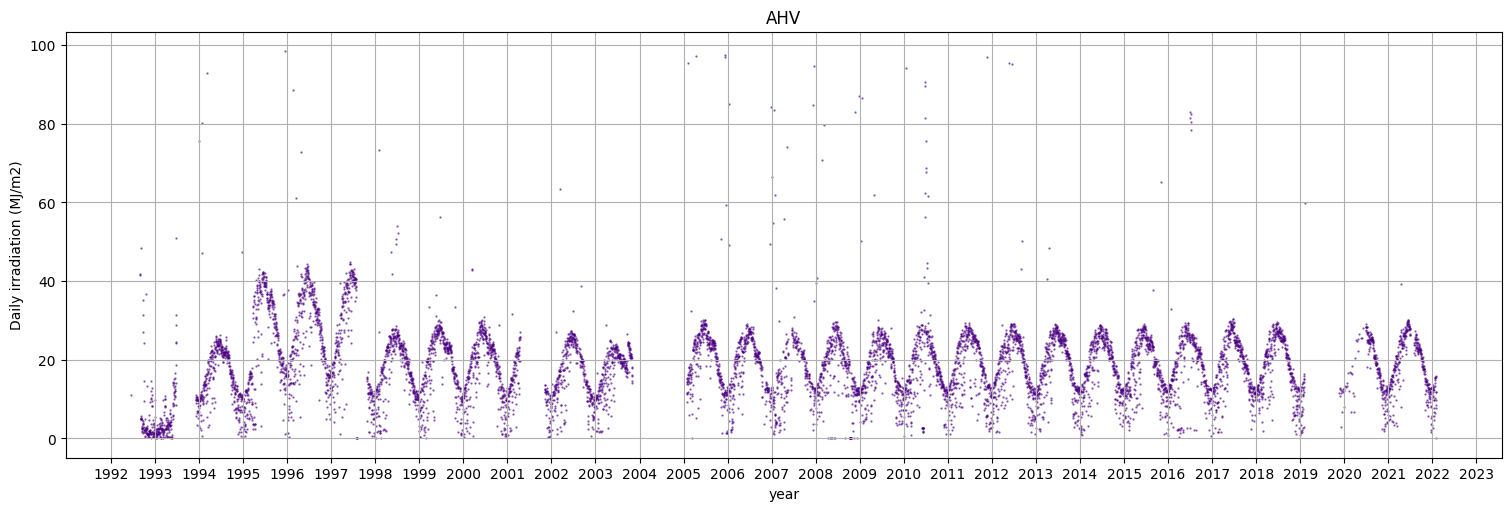

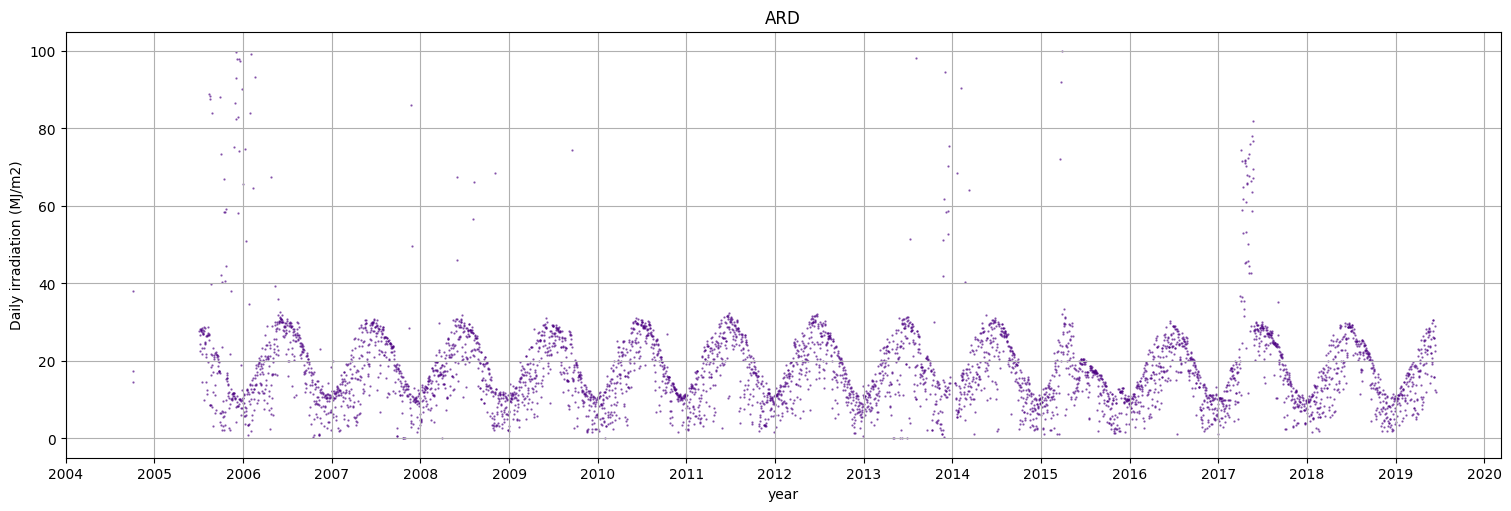

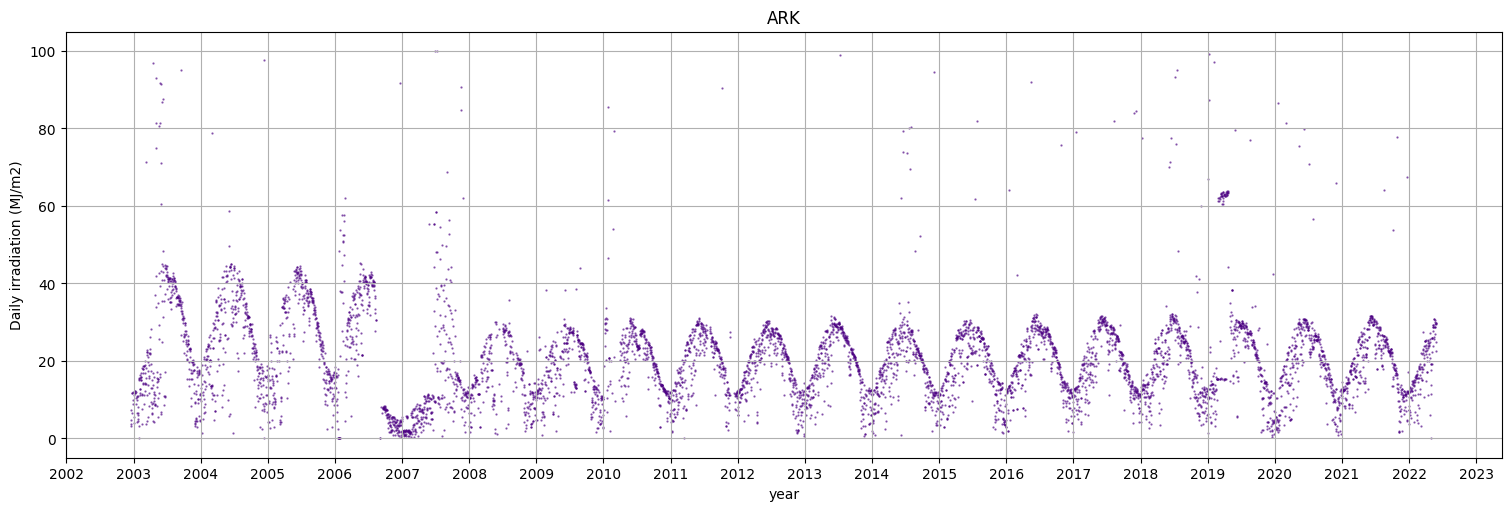

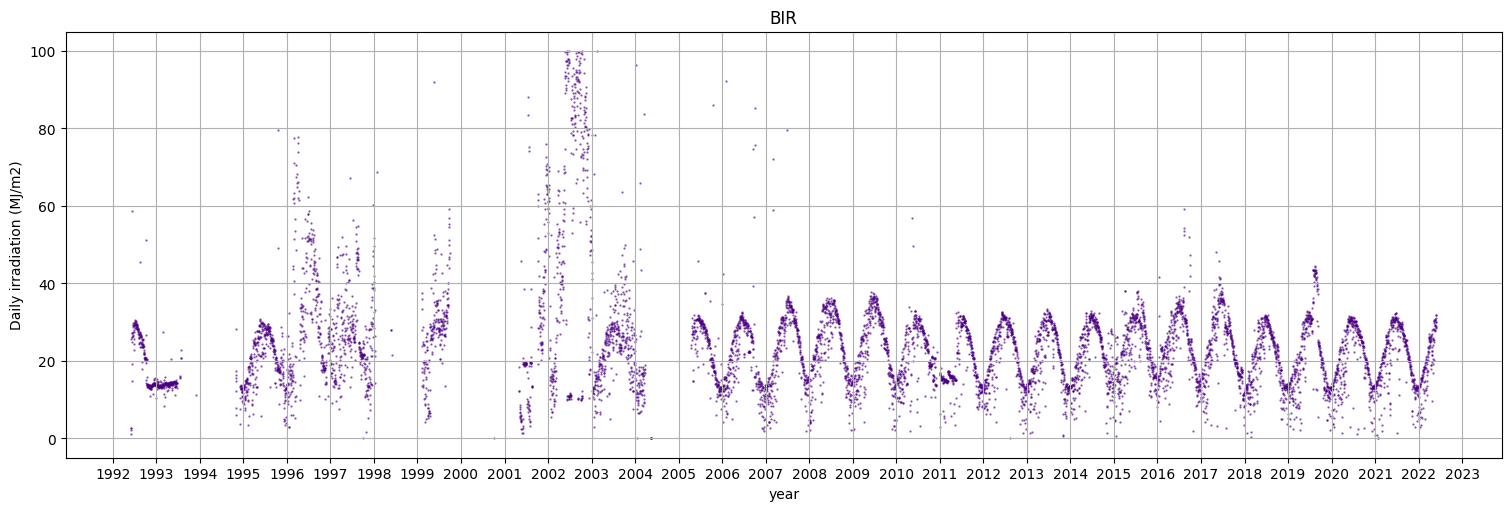

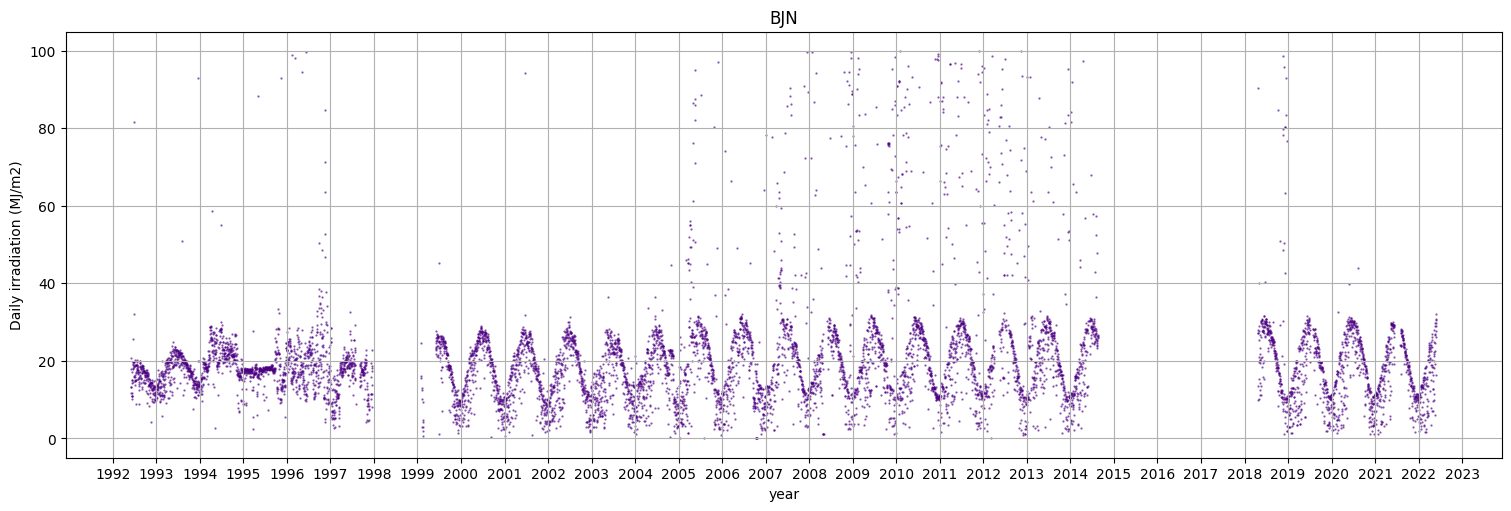

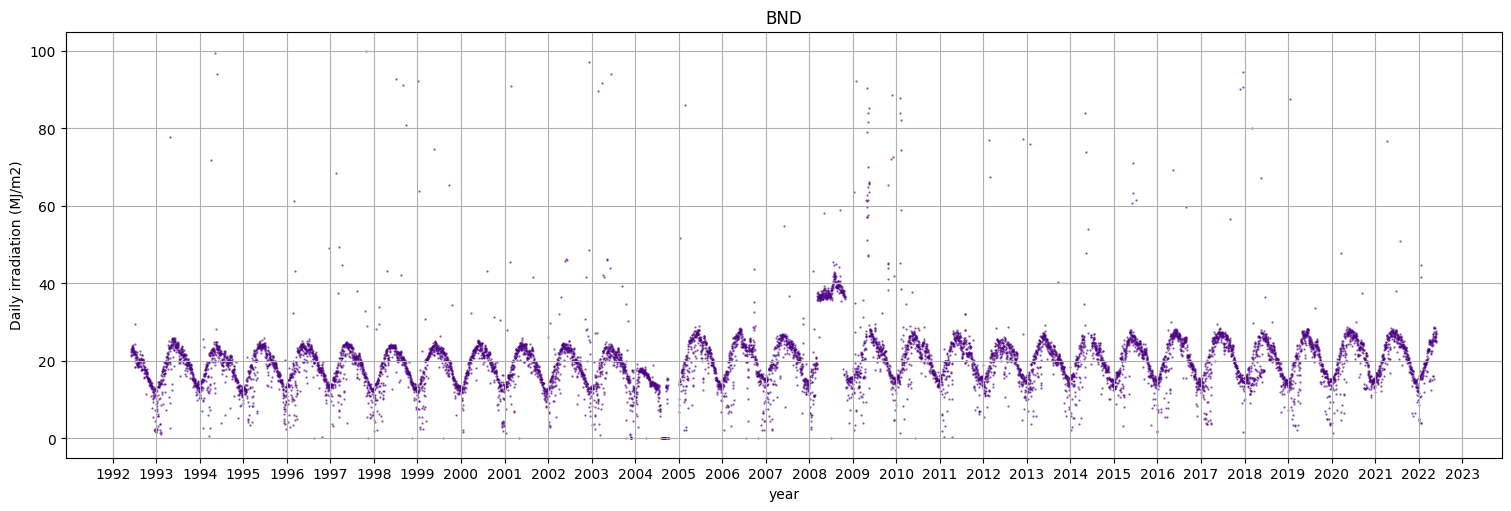

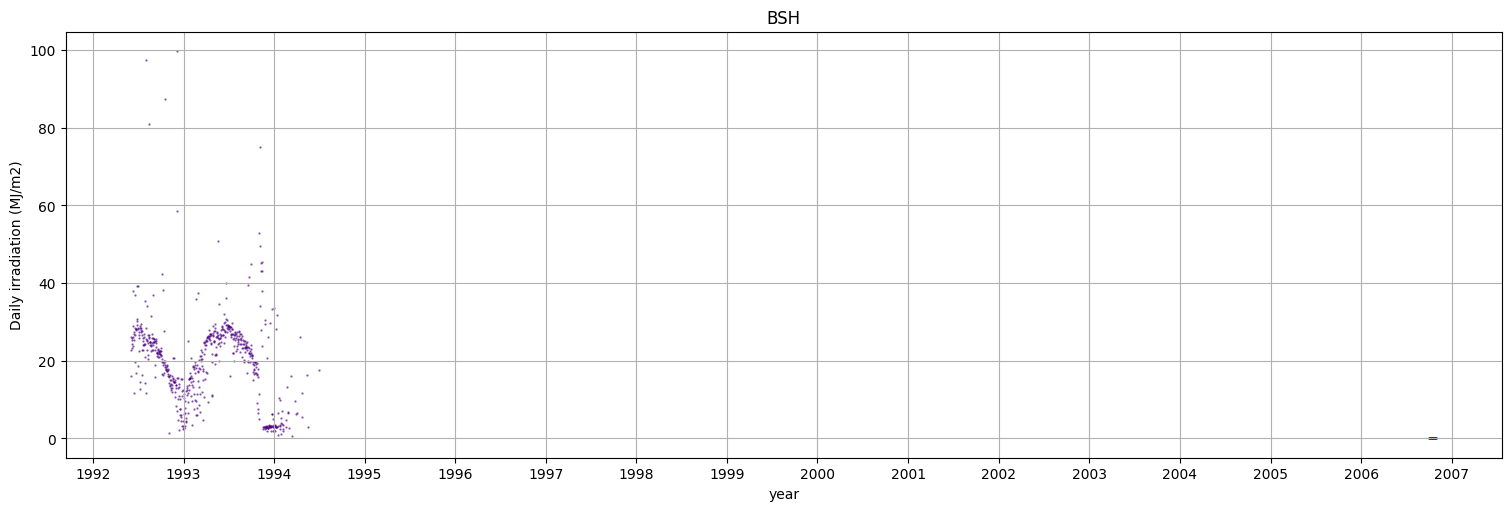

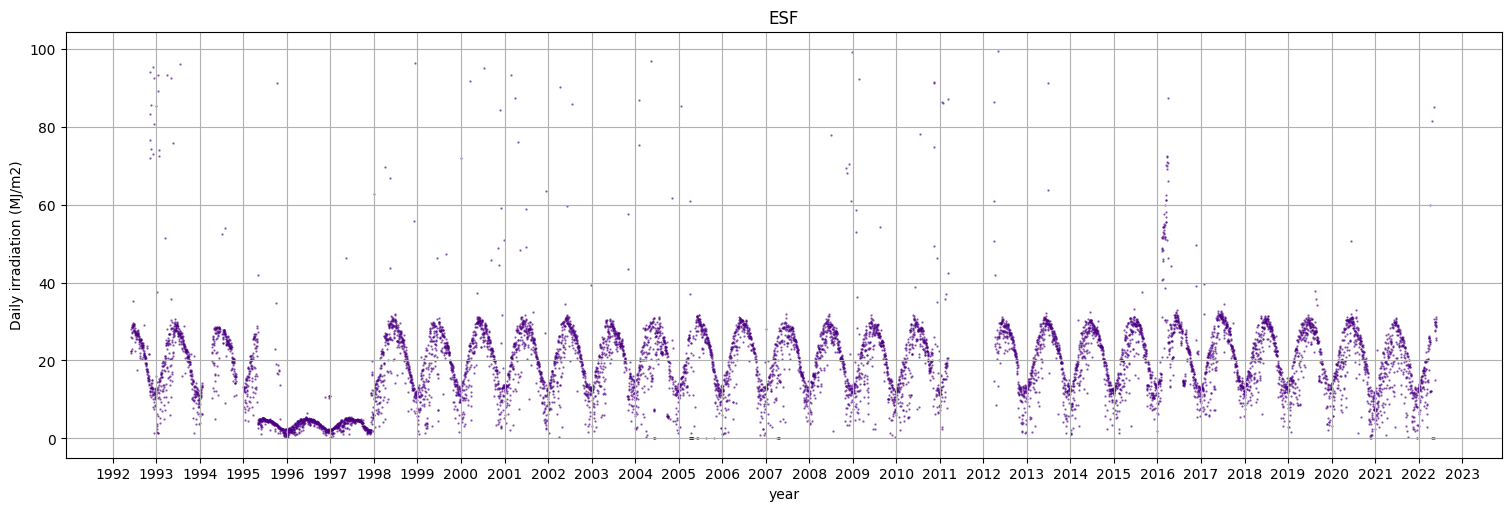

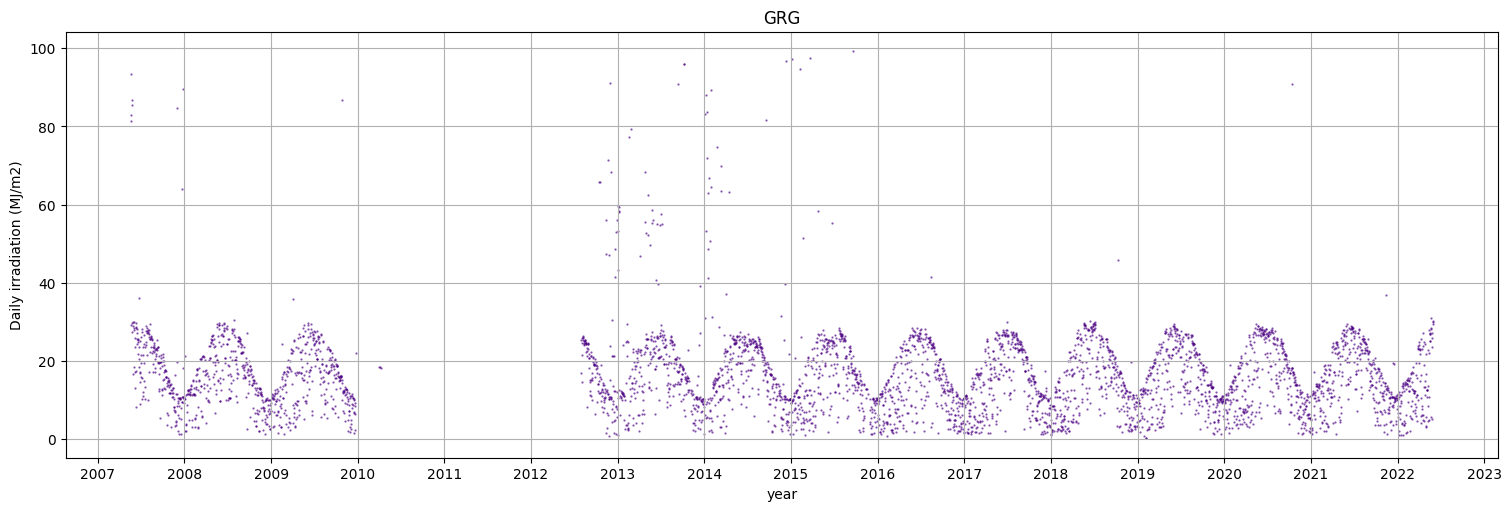

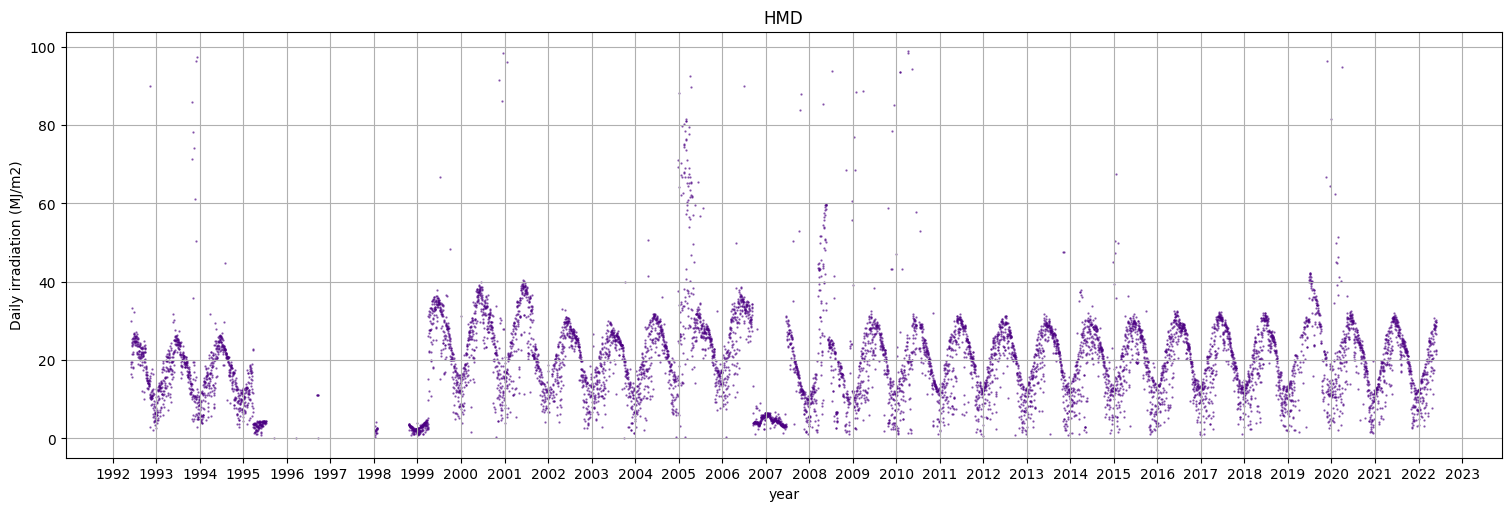

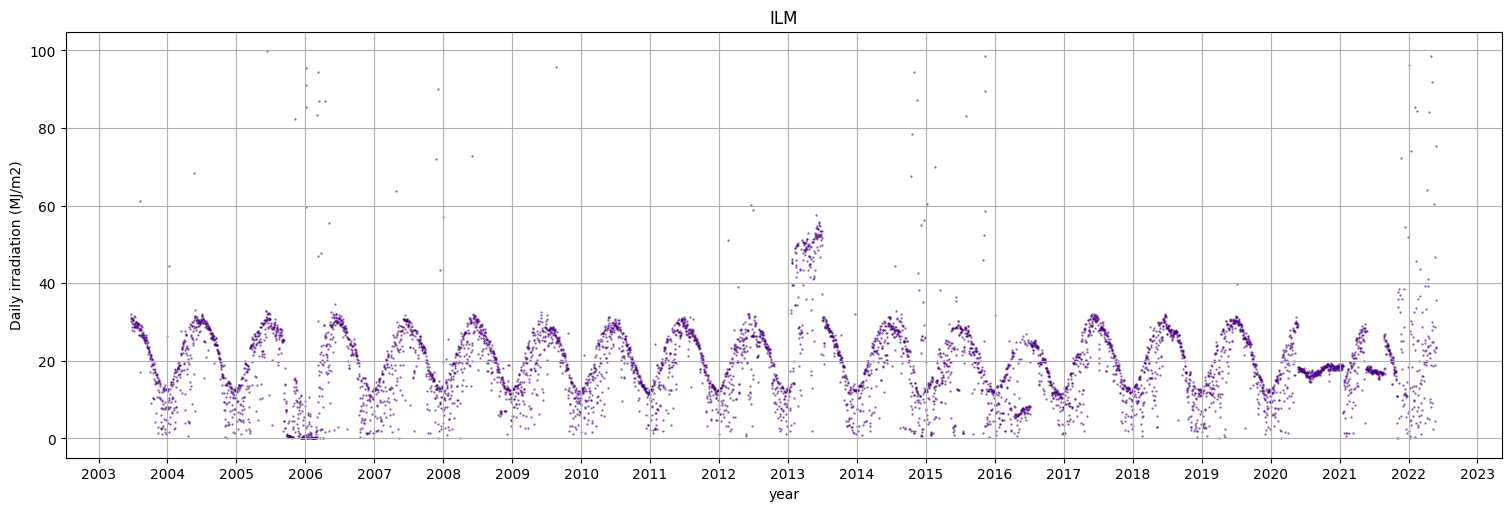

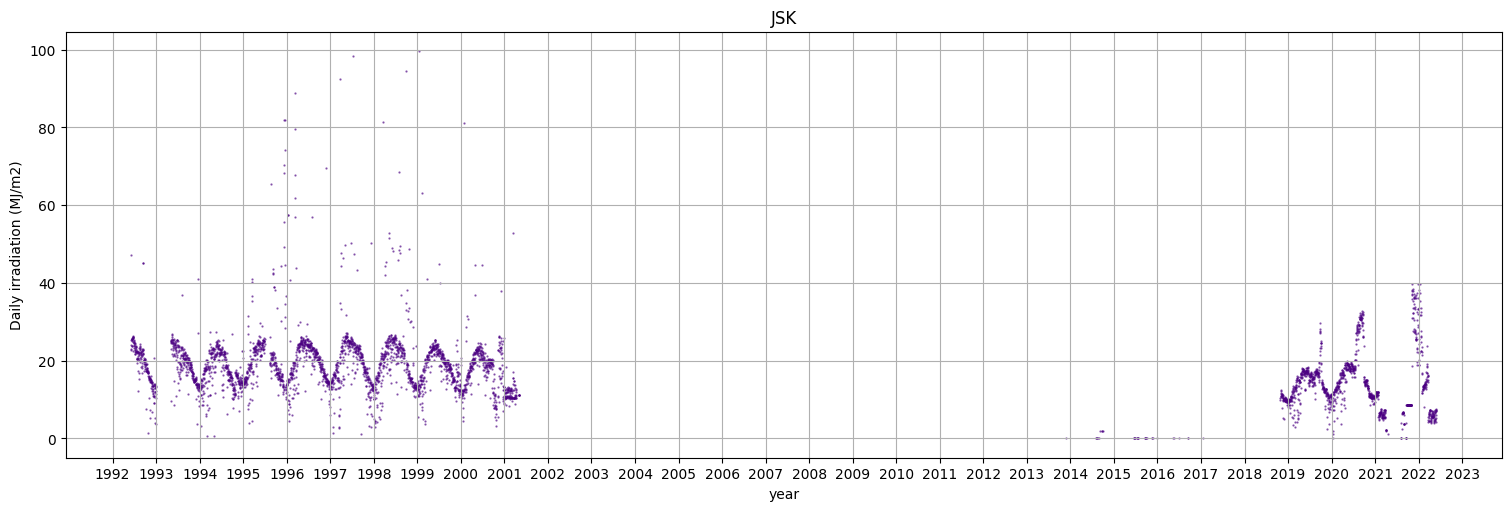

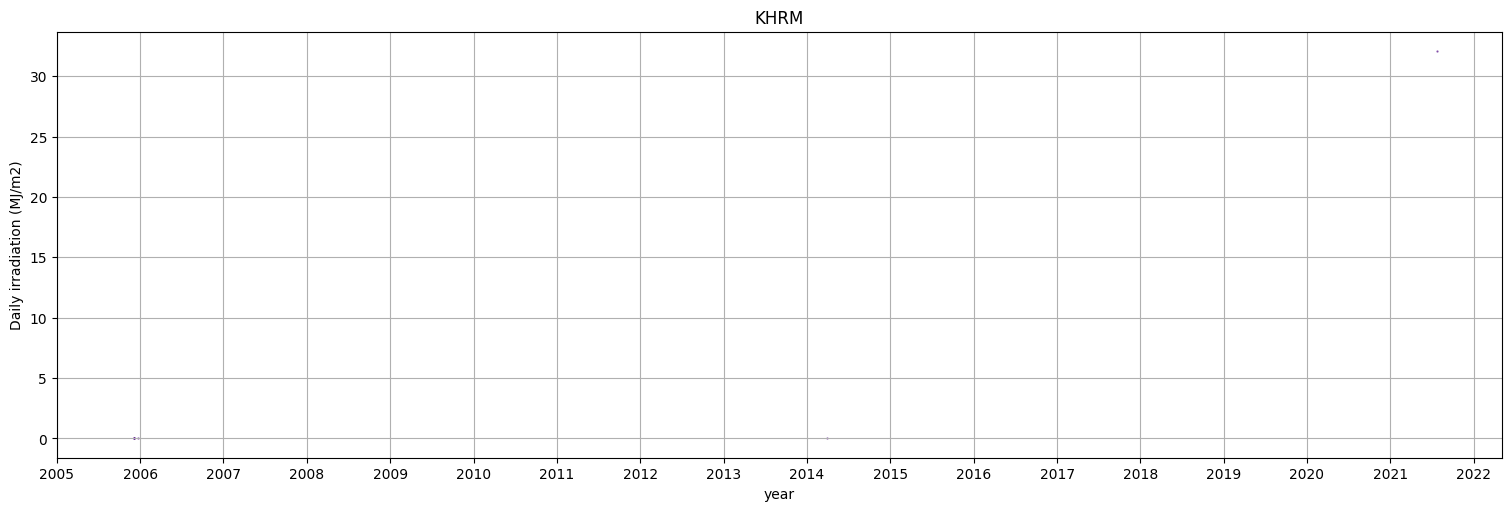

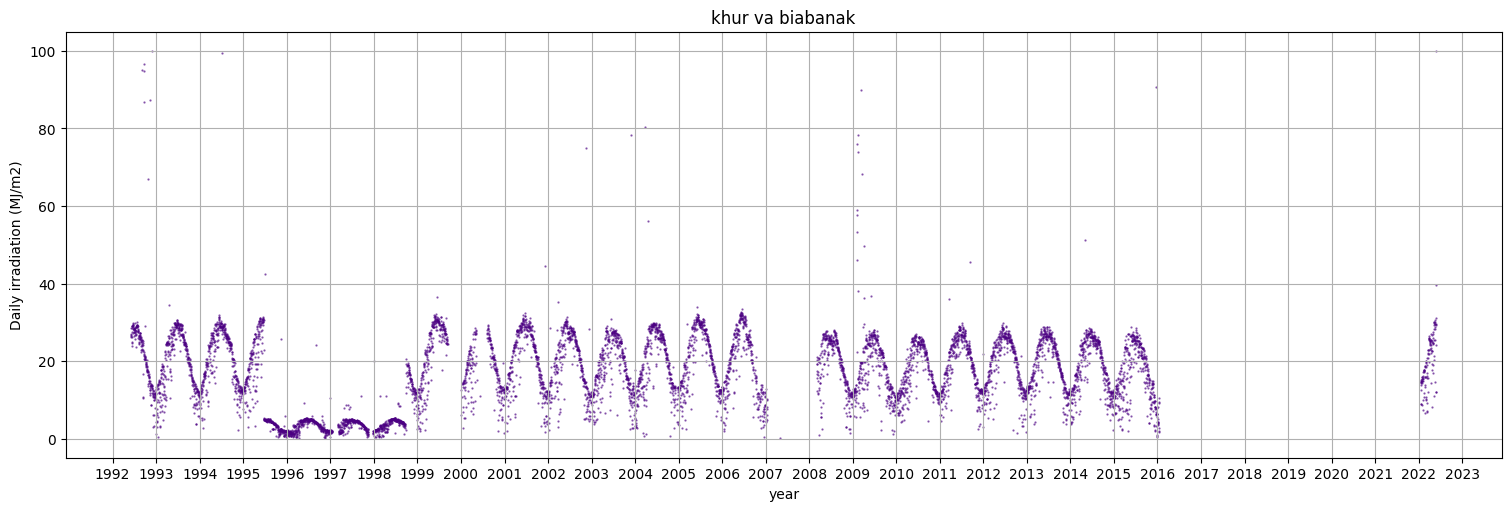

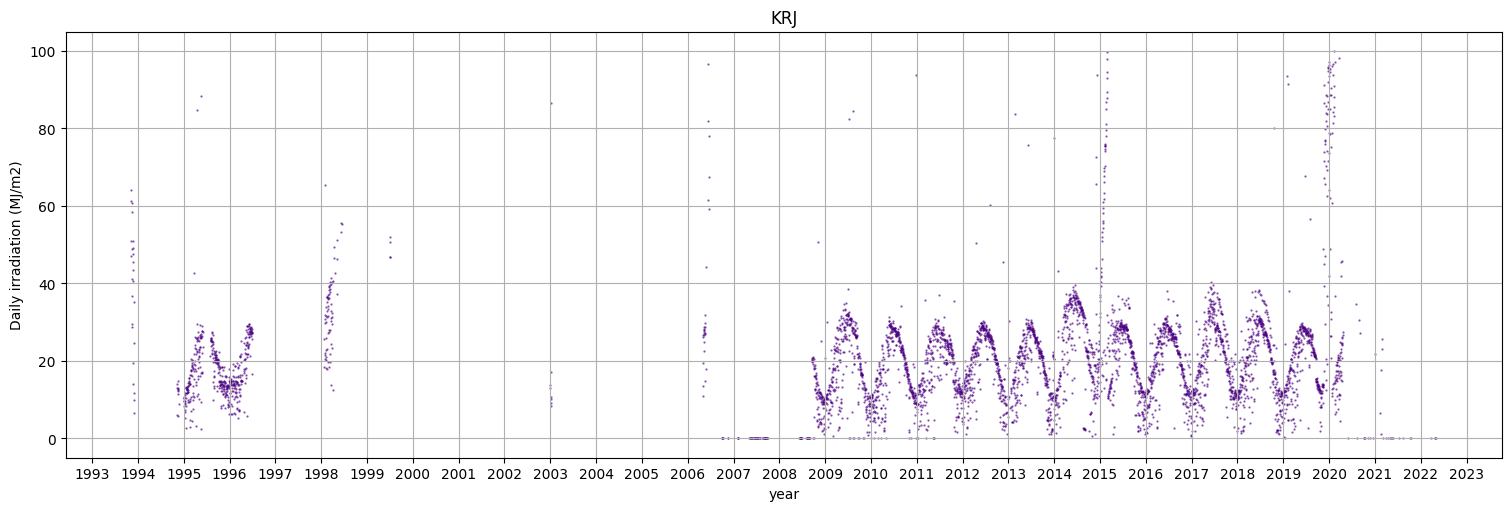

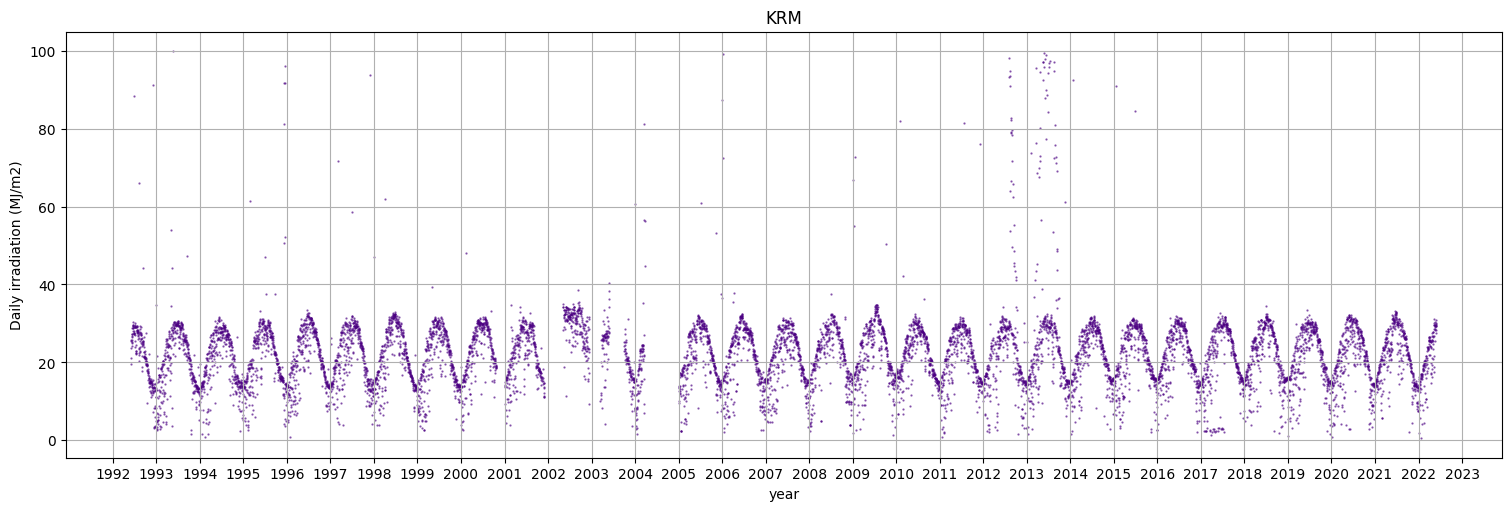

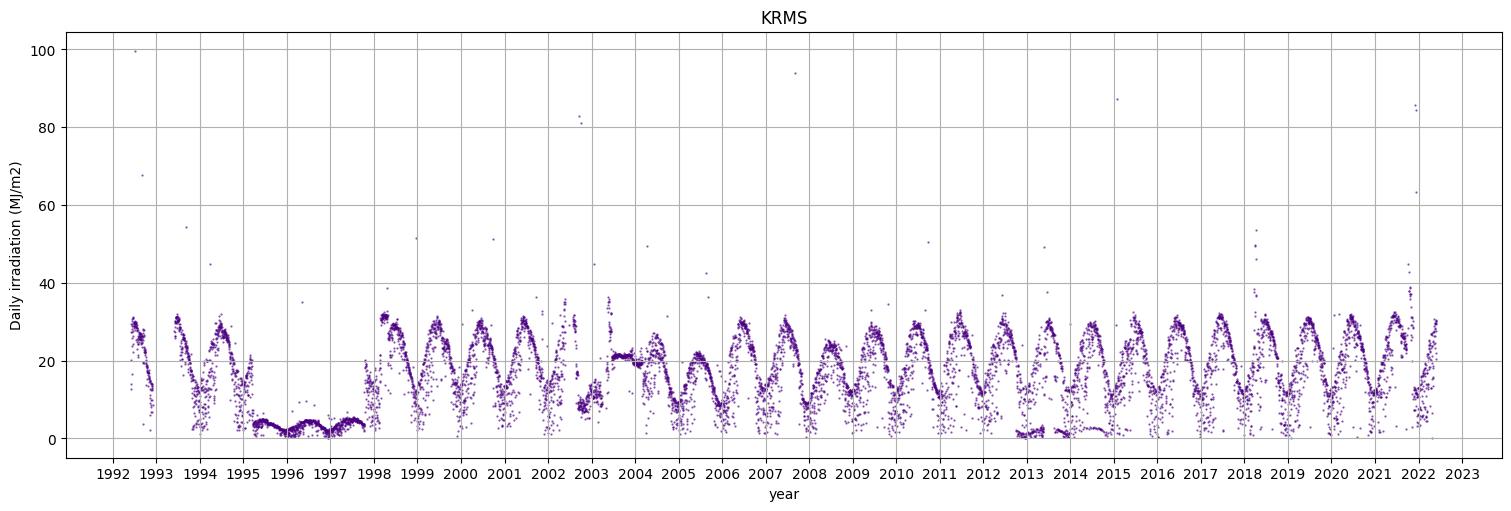

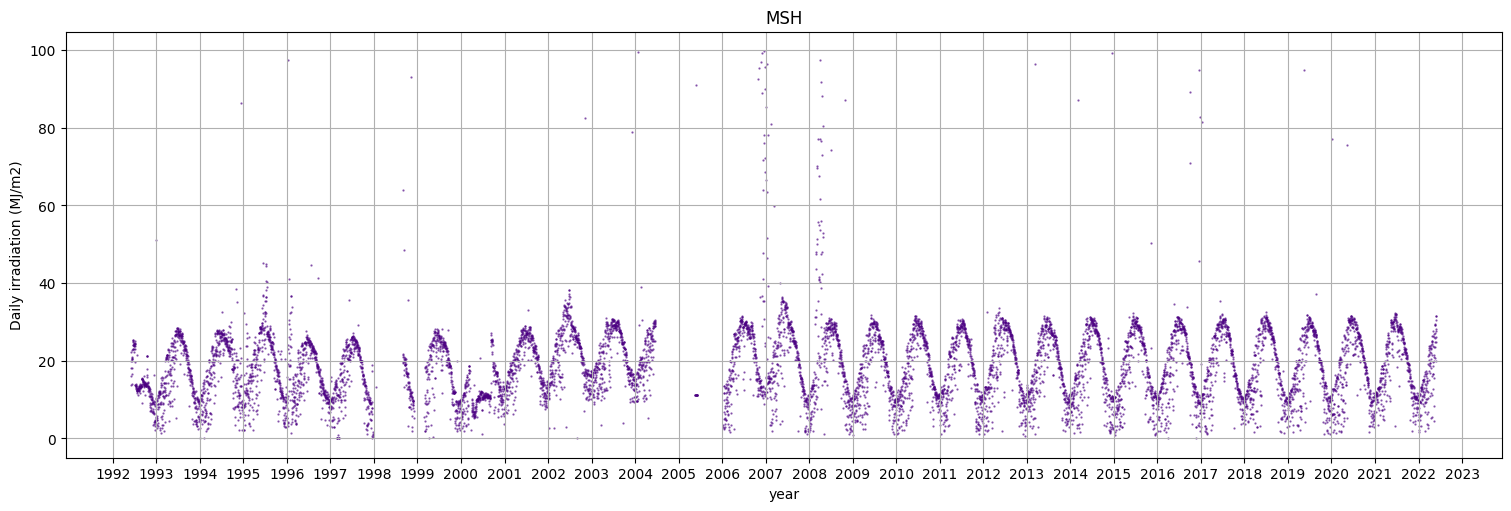

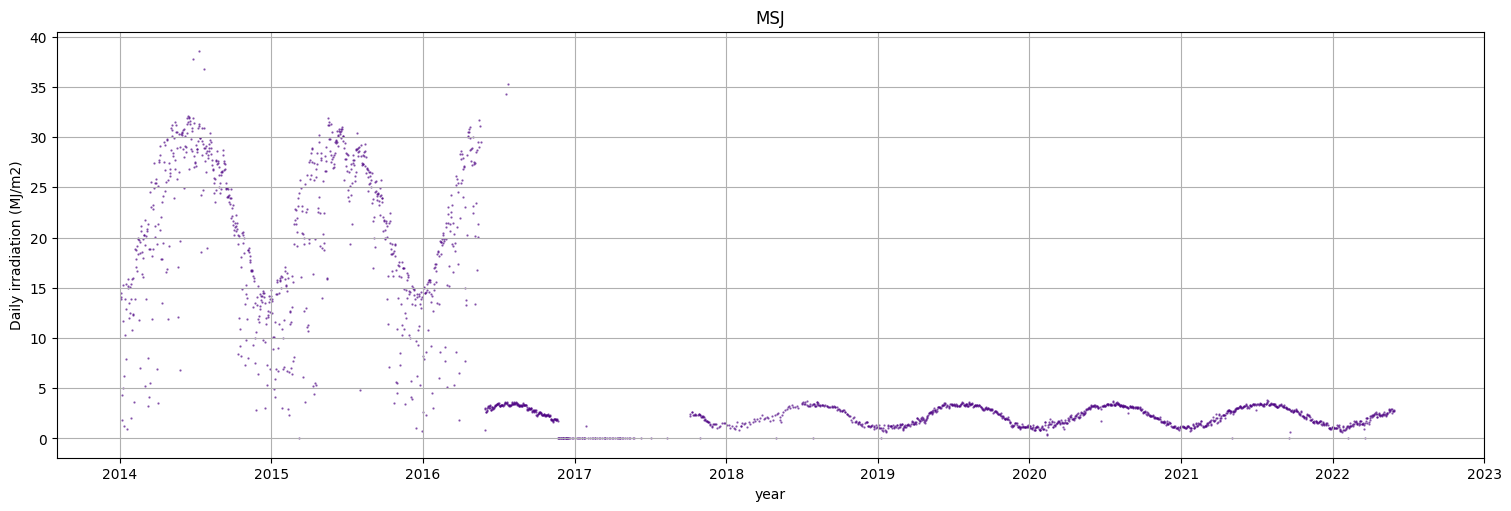

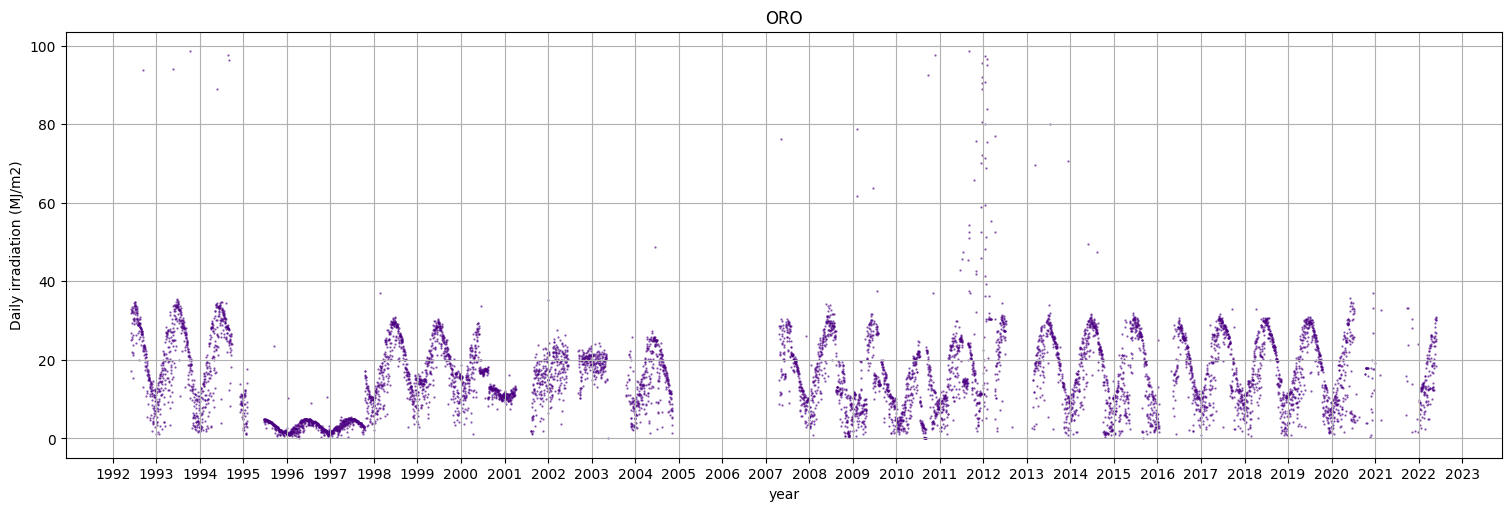

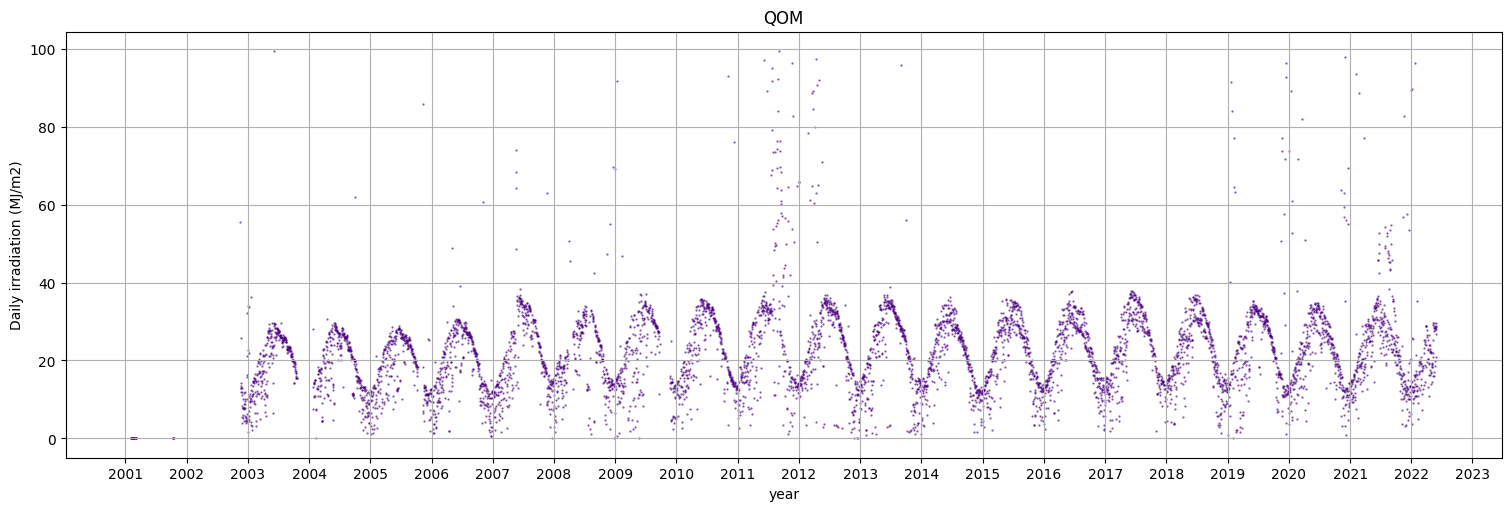

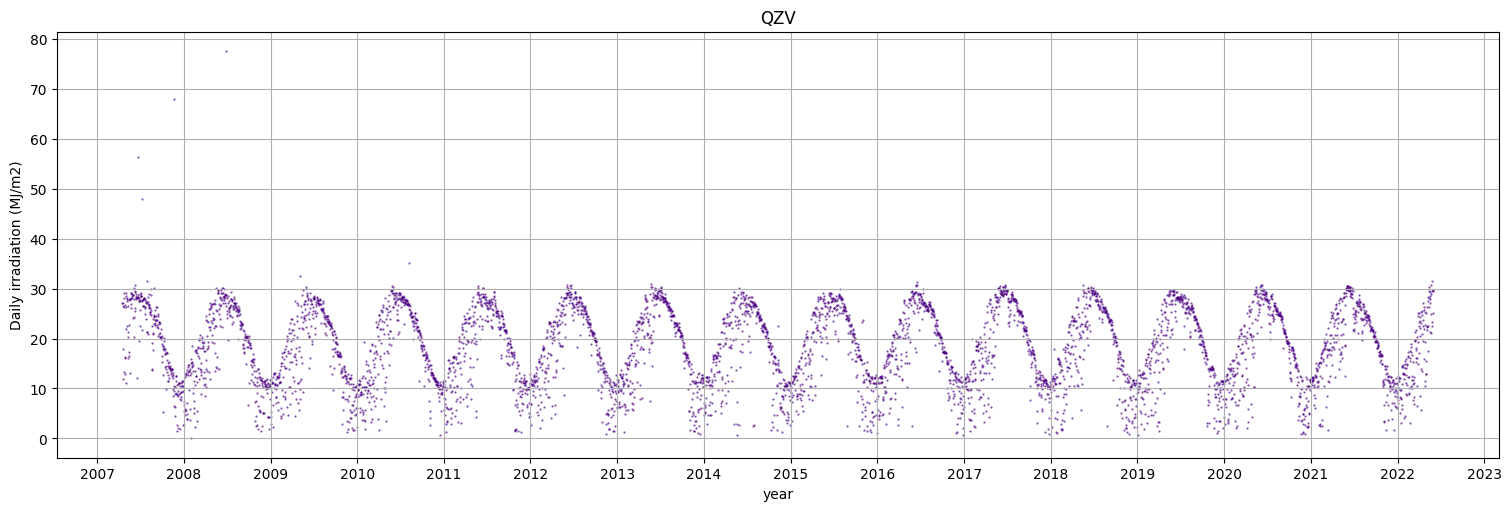

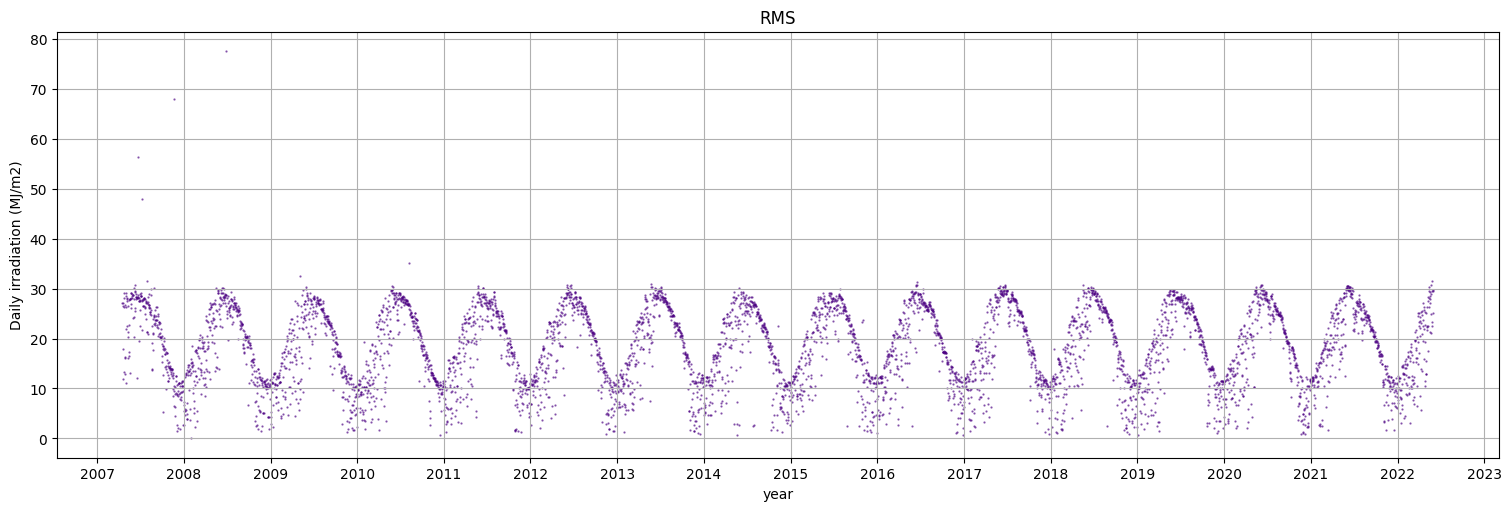

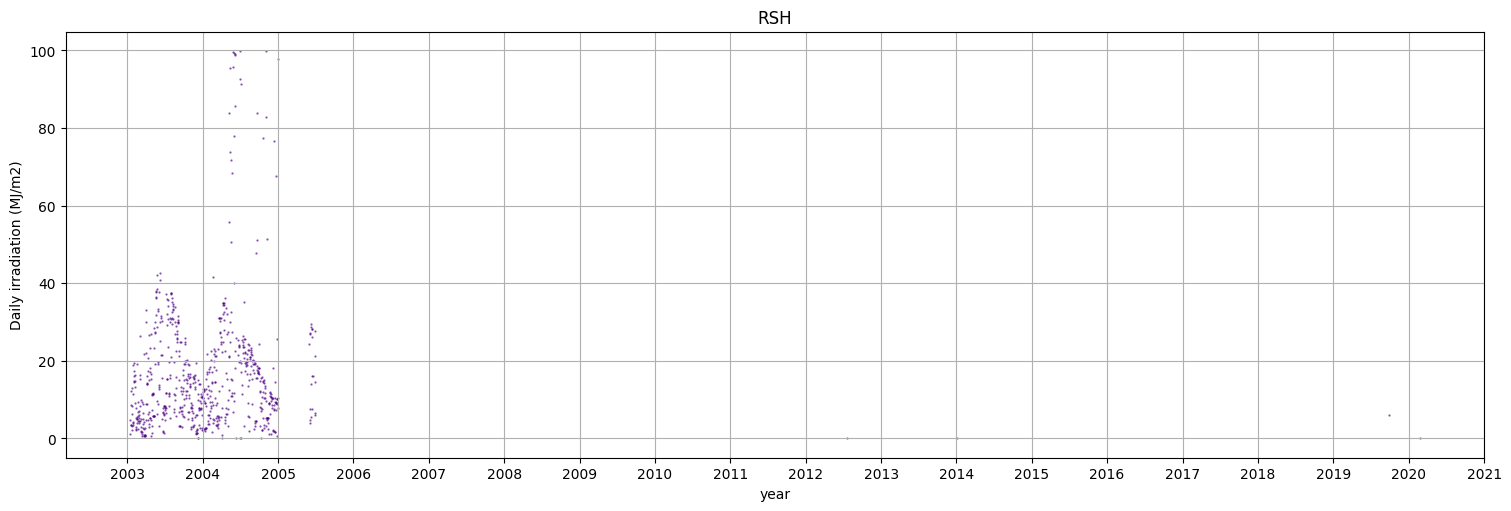

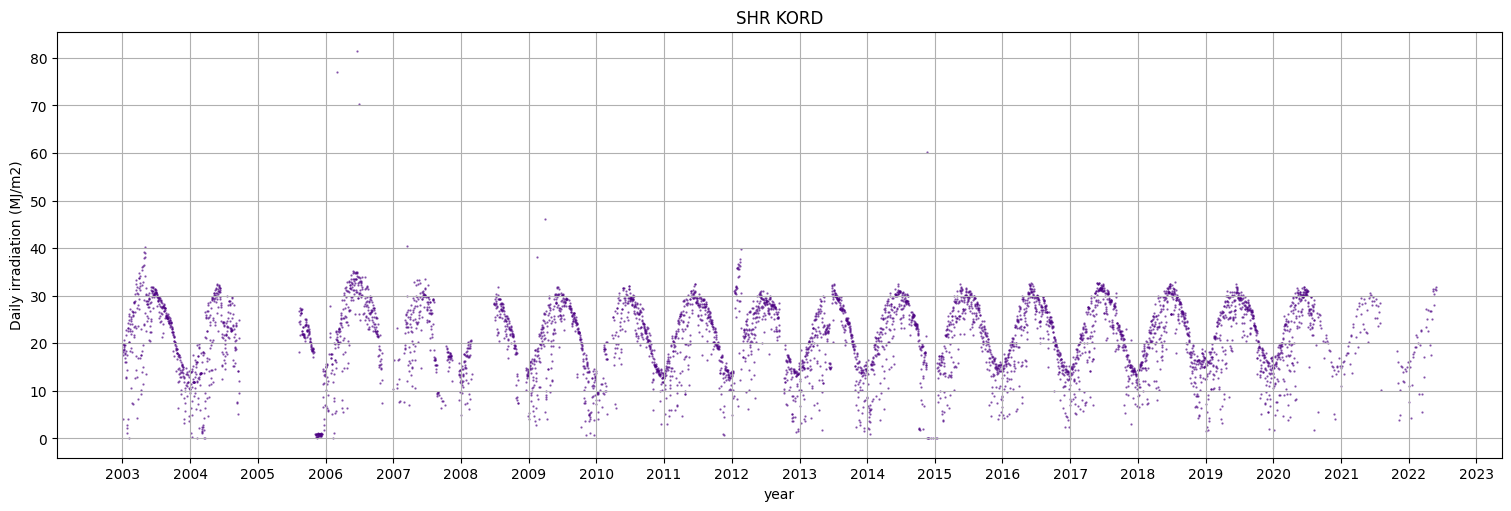

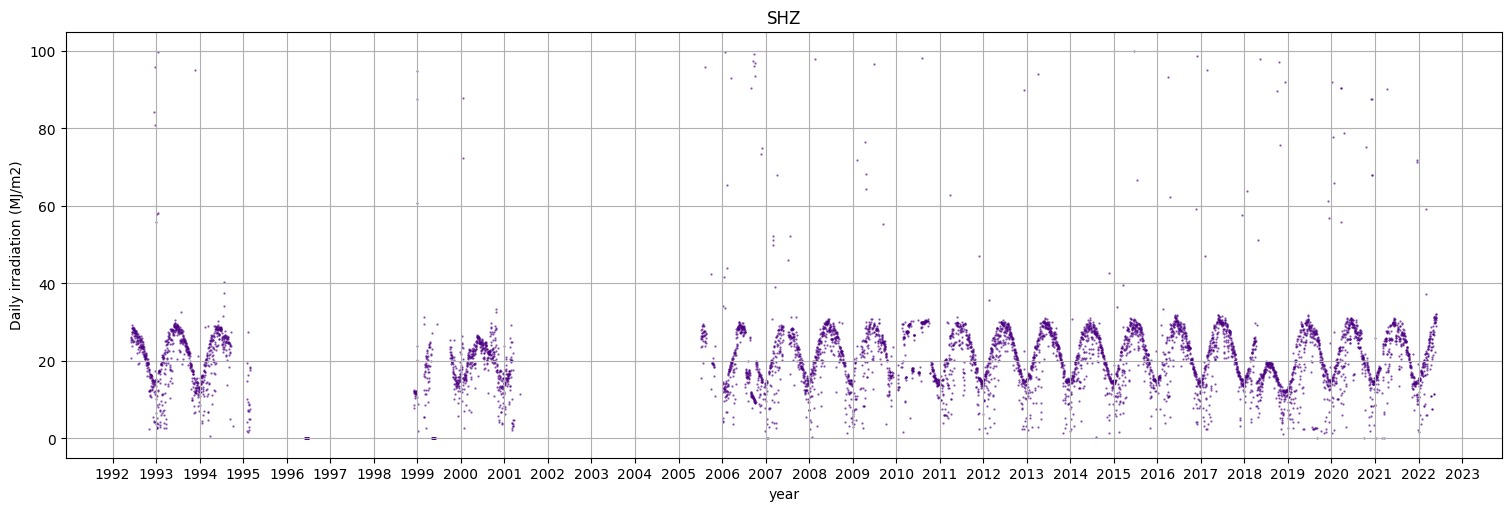

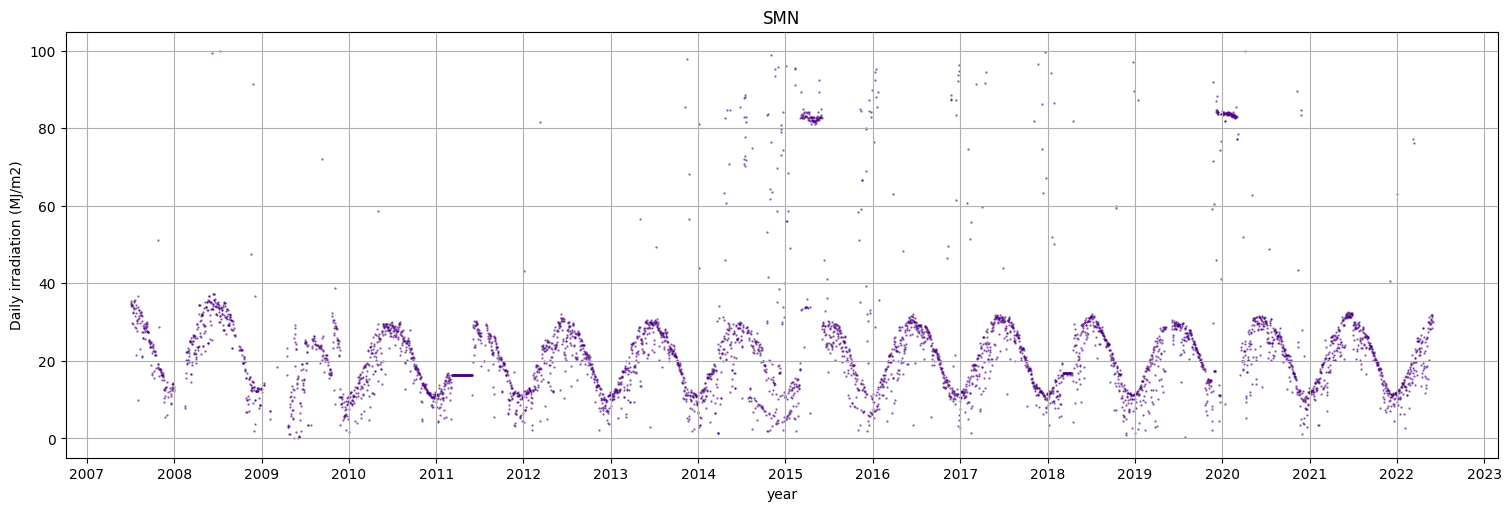

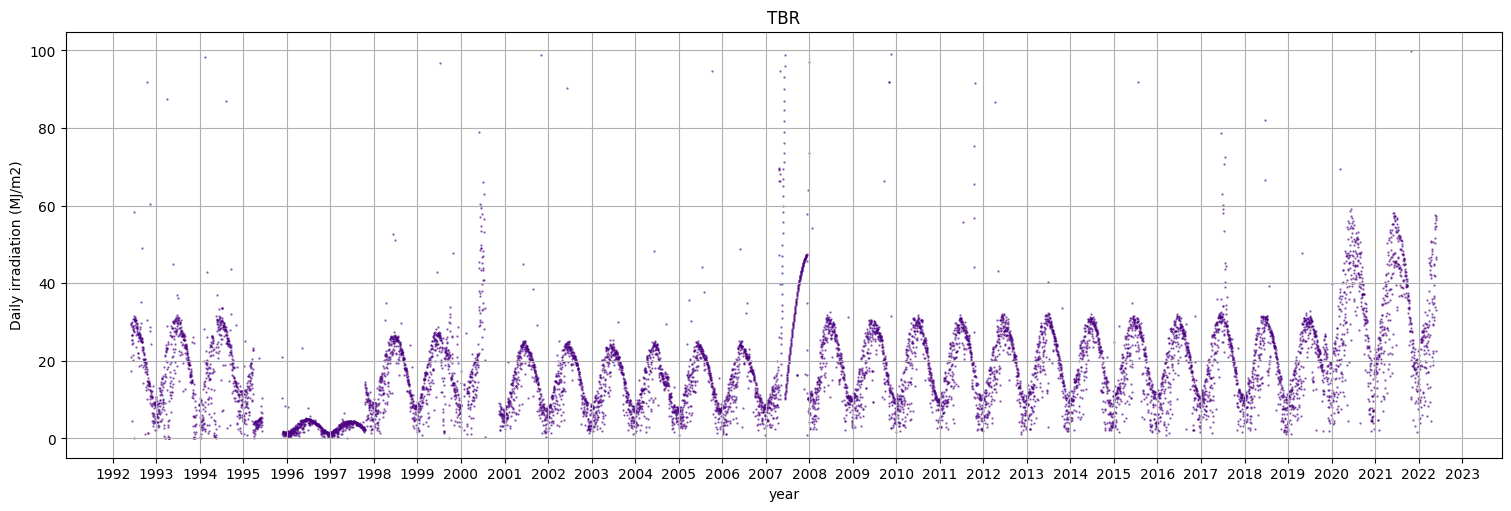

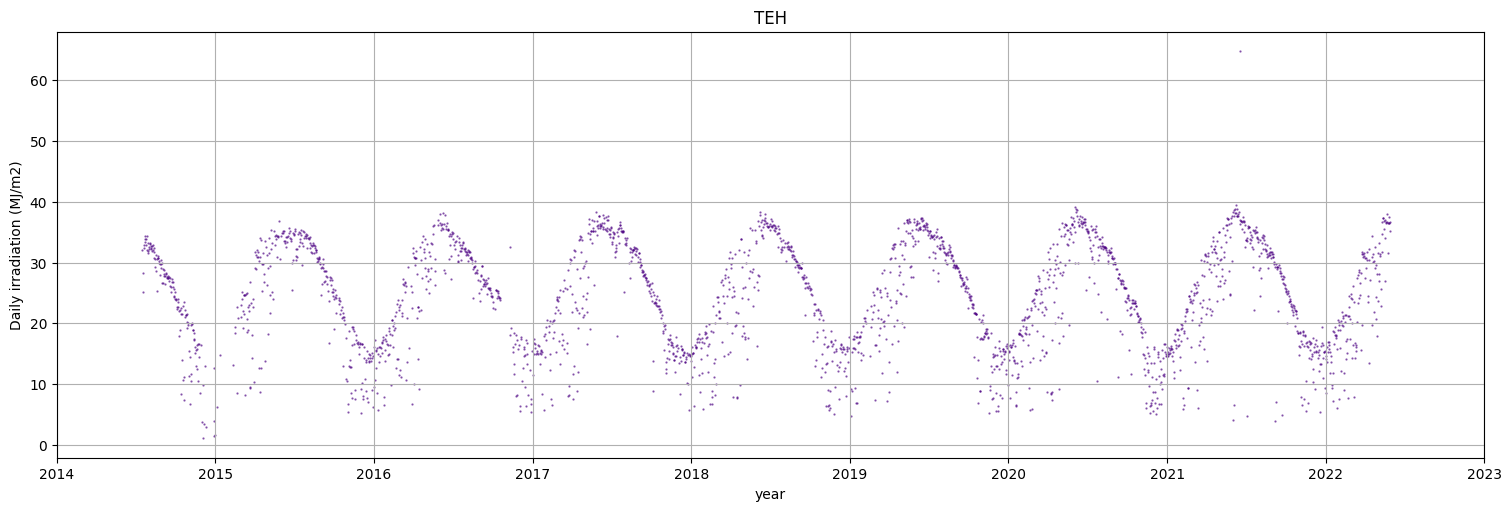

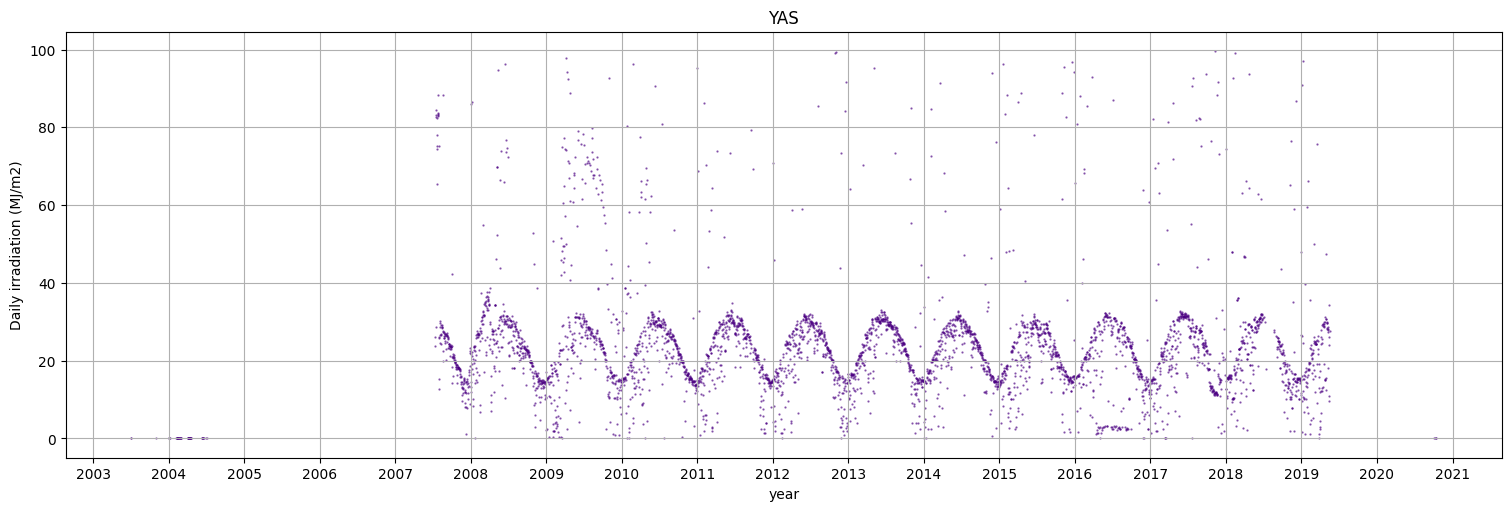

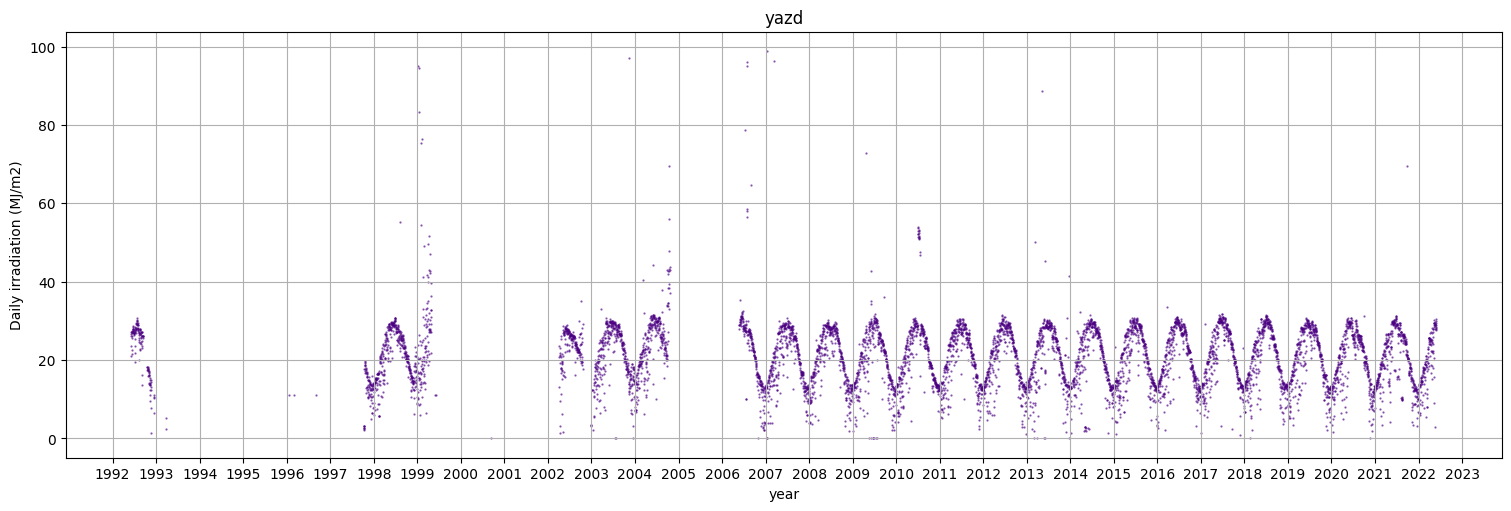

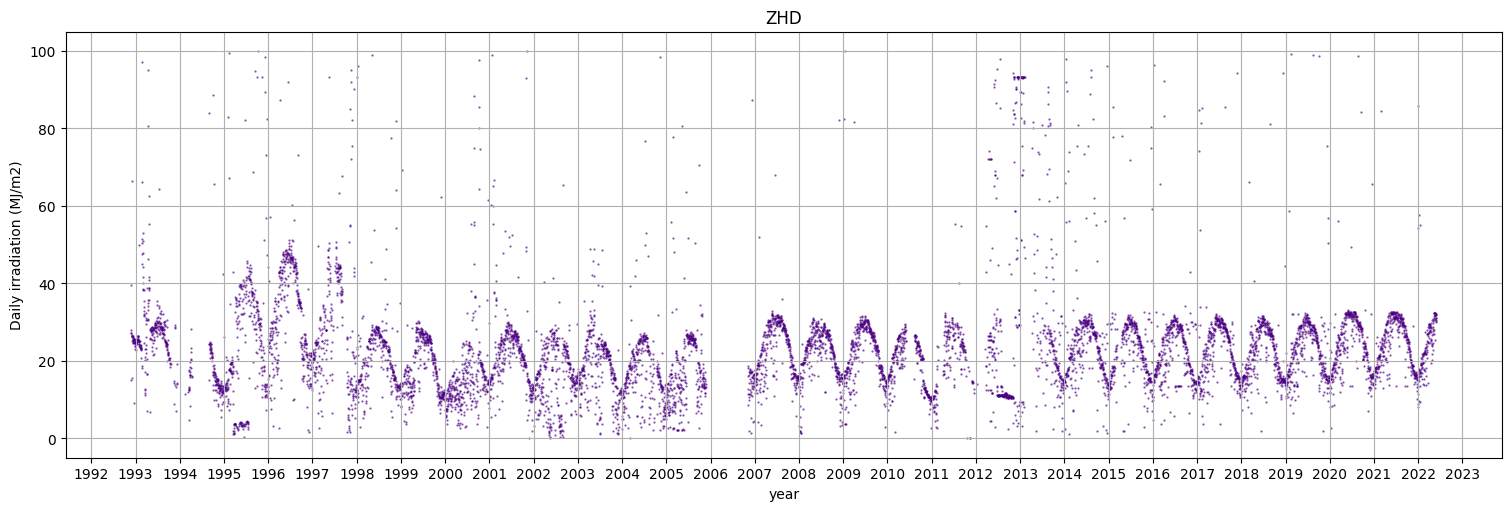

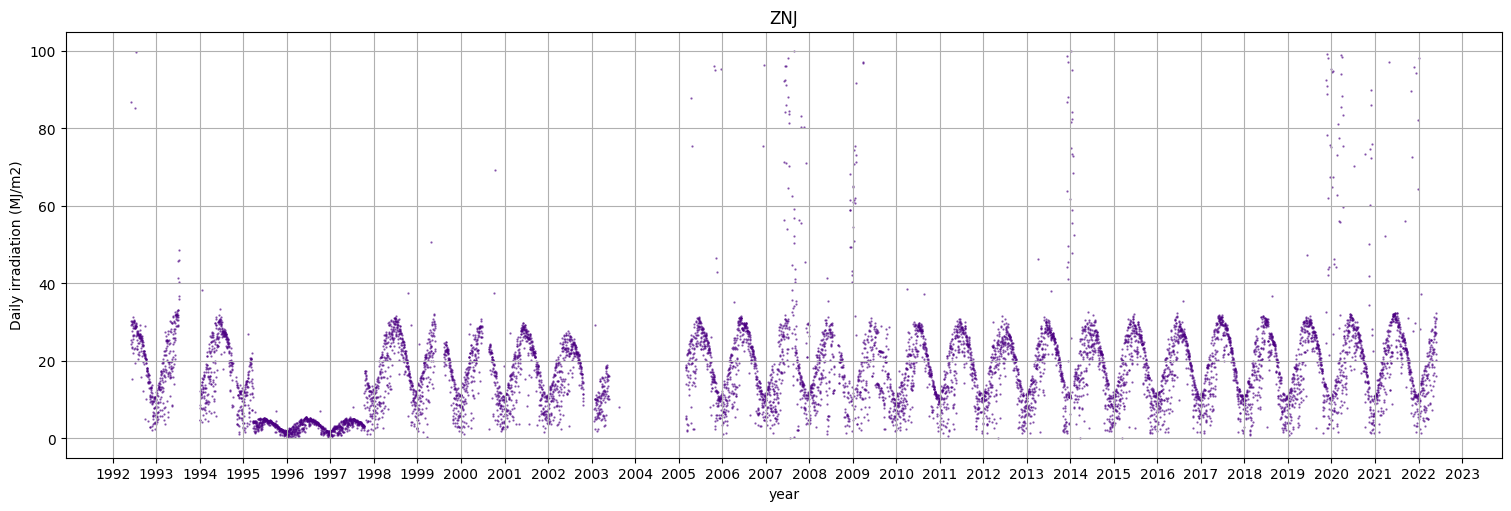

In [9]:
for city in city_names:
    fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')
    plot_city_radiation(fig, ax, city, radiation_frames)

## Data observation results:

Due to visual observation of ploted figures we can find out that:

    1. Data of cities QAZ and RMS looks similar, and should be checked if they are identical or not.
    2. Data of cities ABD, BSH, KHRM, MSJ, RSH are unvalid or sparse, and should be omited.
    3. Some cities have part of unvalid datas that should be omited.

In [10]:
#Checking if QZV and RMS datas are identical or not:
(radiation_frames['QZV'] == radiation_frames['RMS']).all()

time             True
abs_radiation    True
dtype: bool

In [11]:
# deleting unwanted cities from dataset:
delete_list = ['RMS', 'ABD', 'BSH', 'KHRM', 'MSJ', 'RSH']
for city in delete_list:
    city_names.remove(city)
    del radiation_frames[city]

## Seperating valid and unvalid data:

to seperate valid and unvalid data, a dict named validlims is created,
<br>
that contain's upper and lower limits of ir-radiation for each city,
<br>
and chunk of date ranges that contain valid data.

In [12]:
validlims = {
"AHV" : {"val" : [(1994, 1995), (1998, 2001), (2002, 2003), (2005, 2019), (2020, 2022)], "lim" : (0, 35)},
"ARD" : {"val" : [(2006, 2015), (2016, 2019)], "lim" : (0, 35)},
"ARK" : {"val" : [(2008, 2022)], "lim" : (0, 35)},
"BIR" : {"val" : [(1995, 1996), (2006, 2022)], "lim" : (0, 40)},
"BJN" : {"val" : [(2000, 2014), (2019, 2022)], "lim" : (0, 35)},
"BND" : {"val" : [(1993, 2004), (2005, 2008), (2009, 2022)], "lim" : (0, 30)},
"ESF" : {"val" : [(1993, 1994), (1998, 2011), (2013, 2021)], "lim" : (0, 35)},
"GRG" : {"val" : [(2008, 2010), (2013, 2022)], "lim" : (0, 35)},
"HMD" : {"val" : [(2009, 2022)], "lim" : (0, 40)},
"ILM" : {"val" : [(2004, 2005), (2007, 2013), (2014, 2020)], "lim" : (0, 40)},
"JSK" : {"val" : [(1994, 2000)], "lim" : (0, 30)},
"khur va biabanak" : {"val" : [(1993, 1995), (2001, 2007), (2008, 2016)], "lim" : (0, 35)},
"KRJ" : {"val" : [(2009, 2014), (2016, 2020)], "lim" : (0, 40)},
"KRM" : {"val" : [(1993, 2002), (2005, 2022)], "lim" : (0, 40)},
"KRMS" : {"val" : [(1994, 1995), (1999, 2002), (2006, 2022)], "lim" : (0, 35)},
"MSH" : {"val" : [(1993, 1998), (2006, 2022)], "lim" : (0, 35)},
"ORO" : {"val" : [(1998, 2000), (2013, 2016), (2017, 2020)], "lim" : (0, 35)},
"QOM" : {"val" : [(2007, 2009), (2010, 2022)], "lim" : (0, 40)},
"QZV" : {"val" : [(2008, 2022)], "lim" : (0, 35)},
"SHR KORD" : {"val" : [(2009, 2021)], "lim" : (0, 35)},
"SHZ" : {"val" : [(1993, 1994), (2007, 2010), (2011, 2018), (2019, 2022)], "lim" : (0, 35)},
"SMN" : {"val" : [(2010, 2011), (2012, 2014), (2016, 2020), (2021, 2022)], "lim" : (0, 40)},
"TBR" : {"val" : [(1993, 1995), (1998, 2000), (2001, 2007), (2008, 2020)], "lim" : (0, 35)},
"TEH" : {"val" : [(2015, 2022)], "lim" : (0, 40)},
"YAS" : {"val" : [(2008, 2019)], "lim" : (0, 40)},
"yazd" : {"val" : [(1998, 1999), (2003, 2004), (2007, 2022)], "lim" : (0, 35)},
"ZHD" : {"val" : [(1998, 2000), (2001, 2006), (2007, 2011), (2014, 2022)], "lim" : (0, 40)},
"ZNJ" : {"val" : [(1994, 1995), (1998, 2003), (2005, 2022)], "lim" : (0, 35)}
}

In [13]:
def outlier_seperator(frame, validlim):
    '''
    Flaging valid and unvalid datas.

    This function add an validation column to the input data frame,
    that shows if each data point in the data frame is in our desired
    range or not.

    Parameters
    ----------

    frame : `DataFrame`
        A dataframe that contains radiation data of a city.
        
    validlim : `dict`
        Valid ranges for dates and ir-radiation in the dataframe

    Returns : `DataFrame`
        Modified dataframe with added validation columns.
    '''
    
    lim = validlim['lim']    #Ir-radiation valid range
    ranges = validlim['val'] #Dates valid ranges
    
    frame.loc[:, ('valid')] = False

    #Checking if dates are in valid ranges
    for range in ranges:
        logic = frame.time.apply(lambda x: range[0] <= x.year < range[1])
        frame.loc[:, ('valid')] = frame.valid | logic
        
    #Checking if ir-radiation values are in valid ranges
    limlog = frame.abs_radiation.apply(lambda x: lim[0] <= x <= lim[1])

    #Combining both conditions:
    frame.loc[:, ('valid')] = limlog & frame.valid

    return frame

In [14]:
#Adding valid column to all dataframes in radiation_frames:
for city, validlim in validlims.items():
    frame = radiation_frames[city]
    radiation_frames[city] = outlier_seperator(frame, validlim)

## ploting valid & unvalid data

To evaluate the process of saperating valid and unvalid data,
<br>
it's a good choice to plot both.

In [15]:
def subplot_valid_seperation(fig, axes, city_names,radiation_frames):
    """
    Scatter Plot valid & unvalid radiation values
    of multiple cities in a single figure.

    Parameters
    ----------

    fig : `matplotlib.figure.Figure`
        fig object returned by the matplotlib subplot function.
    
    axes : `numpy.ndarray`
        axes returned by the matplotlib subplot function.
    
    city_names : `list`
        A list of city names.
    
    radiation_frames : `dict`
        A dict witch city names are it's keys,
        and cities radiation DataFrames are it's values.
    """

    fig.suptitle('DAILY IR RADIATION\npurple : valid, red : unvalid',
                 fontsize=32)
    
    for city, ax in zip(city_names, axes.ravel()):
        frame = radiation_frames[city]
        valid = frame[frame.valid]
        unvalid = frame[~frame.valid]
        
        ax.scatter(valid.time, valid.abs_radiation, s=0.4,
                   alpha=0.6, c='indigo')
        ax.scatter(unvalid.time, unvalid.abs_radiation, s=0.4,
                   alpha=0.6, c='crimson')
        ax.set_title(city)

    # Omit extra unsused empty axes
    empty_axes_len = 6*6 - len(city_names)
    for i in range(empty_axes_len):
        ax = axes.ravel()[-(i+1)]
        fig.delaxes(ax)

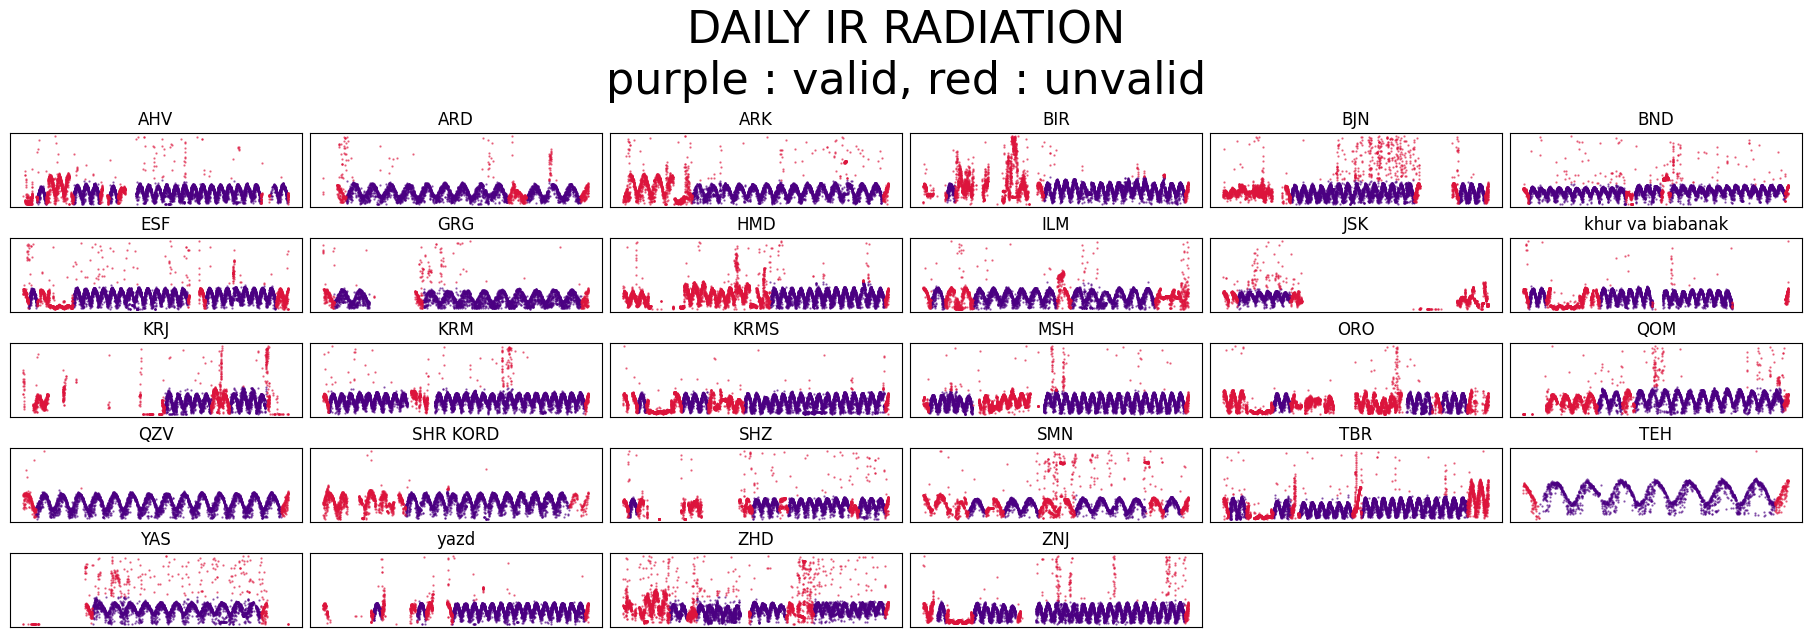

In [16]:
fig, axes = plt.subplots(6, 6, figsize=(18, 7), layout='constrained',
                        subplot_kw={'xticks':(), 'yticks':()})

subplot_valid_seperation(fig, axes, city_names, radiation_frames)

## Saving data:

Now that dataset is manually cleaned, data should be saved for further processes

In [17]:
#Dropping all unvalid datapoints and the valid column.
for city, frame in radiation_frames.items():
    frame = frame[frame.valid]
    radiation_frames[city] = frame.drop('valid', axis=1)

In [18]:
#Omiting hour from dataset's time, and just keeping date:
for city, frame in radiation_frames.items():
    time = frame.time
    time = time.apply(lambda x: x.floor('D'))
    frame.time = time
    radiation_frames[city] = frame

In [19]:
#Converting DataFrames to Series, and saving them in a dict:
radiation_series = {}

for city, frame in radiation_frames.items():
    series = frame.set_index('time').squeeze()
    radiation_series[city] = series

In [20]:
#Combining all datas into a single DataFrame:
all_rads = pd.DataFrame(radiation_series)
all_rads

AHV  ARD    ARK    BIR    BJN    BND    ESF    GRG    HMD  ILM  \
time                                                                           
1993-01-01    NaN  NaN    NaN    NaN    NaN  12.62  12.90    NaN    NaN  NaN   
1993-01-02    NaN  NaN    NaN    NaN    NaN  12.28  12.47    NaN    NaN  NaN   
1993-01-03    NaN  NaN    NaN    NaN    NaN   8.48   2.47    NaN    NaN  NaN   
1993-01-04    NaN  NaN    NaN    NaN    NaN   2.27    NaN    NaN    NaN  NaN   
1993-01-05    NaN  NaN    NaN    NaN    NaN   2.49   6.29    NaN    NaN  NaN   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...  ...   
2021-12-27  12.95  NaN  11.82  13.25  10.91  11.93    NaN  11.39  12.28  NaN   
2021-12-28  12.67  NaN  12.11  13.32  10.56  13.89    NaN  10.41  10.45  NaN   
2021-12-29   5.78  NaN   7.43   6.50   9.99  13.13    NaN   7.75   7.33  NaN   
2021-12-30   3.40  NaN   7.25   6.59   9.22   8.57    NaN  10.05   9.22  NaN   
2021-12-31  11.17  NaN  10.80   6.59   5.61  11.75    NaN   6.78  11.95  NaN   

            ...    QZV  SHR KORD    SHZ    SMN   TBR    TEH  YAS   yazd  \
time        ...                                                           
1993-01-01  ...    NaN       NaN  14.62    NaN  8.09    NaN  NaN    NaN   
1993-01-02  ...    NaN       NaN  13.59    NaN  9.57    NaN  NaN    NaN   
1993-01-03  ...    NaN       NaN   2.96    NaN  8.91    NaN  NaN    NaN   
1993-01-04  ...    NaN       NaN   2.79    NaN  4.34    NaN  NaN    NaN   
1993-01-05  ...    NaN       NaN    NaN    NaN  4.26    NaN  NaN    NaN   
...         ...    ...       ...    ...    ...   ...    ...  ...    ...   
2021-12-27  ...  10.90       NaN  15.01  11.86   NaN  15.20  NaN  11.22   
2021-12-28  ...  11.06       NaN  14.21  11.77   NaN  15.22  NaN   8.43   
2021-12-29  ...   5.99       NaN   2.05  11.49   NaN   9.29  NaN   9.94   
2021-12-30  ...   8.36       NaN  19.24    NaN   NaN  15.38  NaN  10.12   
2021-12-31  ...   9.18       NaN  13.57  11.18   NaN  14.19  NaN    NaN   

              ZHD    ZNJ  
time                      
1993-01-01    NaN    NaN  
1993-01-02    NaN    NaN  
1993-01-03    NaN    NaN  
1993-01-04    NaN    NaN  
1993-01-05    NaN    NaN  
...           ...    ...  
2021-12-27  15.17  11.09  
2021-12-28  16.04  10.96  
2021-12-29  13.38   6.19  
2021-12-30   8.75    NaN  
2021-12-31   7.98  10.43  

[10592 rows x 28 columns]

In [21]:
#Stacking the all_rads DataFrame:
all_rads = all_rads.stack()
all_rads = all_rads.reset_index()
all_rads.columns = ['time', 'city', 'radiation']
all_rads

time              city  radiation
0      1993-01-01               BND      12.62
1      1993-01-01               ESF      12.90
2      1993-01-01  khur va biabanak      12.90
3      1993-01-01               KRM      13.38
4      1993-01-01               MSH      10.42
...           ...               ...        ...
149502 2021-12-31               SHZ      13.57
149503 2021-12-31               SMN      11.18
149504 2021-12-31               TEH      14.19
149505 2021-12-31               ZHD       7.98
149506 2021-12-31               ZNJ      10.43

[149507 rows x 3 columns]

In [22]:
#Pickling the all_rads:
with open(r'..\data\interim\01_reading_data\all_rads.pkl', 'wb') as f:
    pickle.dump(all_rads, f)

## Conclusion:

In this notebook:

    1. The raw excel files are loded.
    2. Noisy and wrong data points are omited.
    3. All cities data points are stacked together in a single DataFrame.
    4. The final DataFramed is pickled for further processes.